In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%cd /content/drive/My Drive/panda

/content/drive/My Drive/panda


In [7]:
df=pd.read_csv('fb.csv',index_col='Date',parse_dates=["Date"])
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


#**Shift() function working:** It shifts the data points(available for both dataframe and time series)

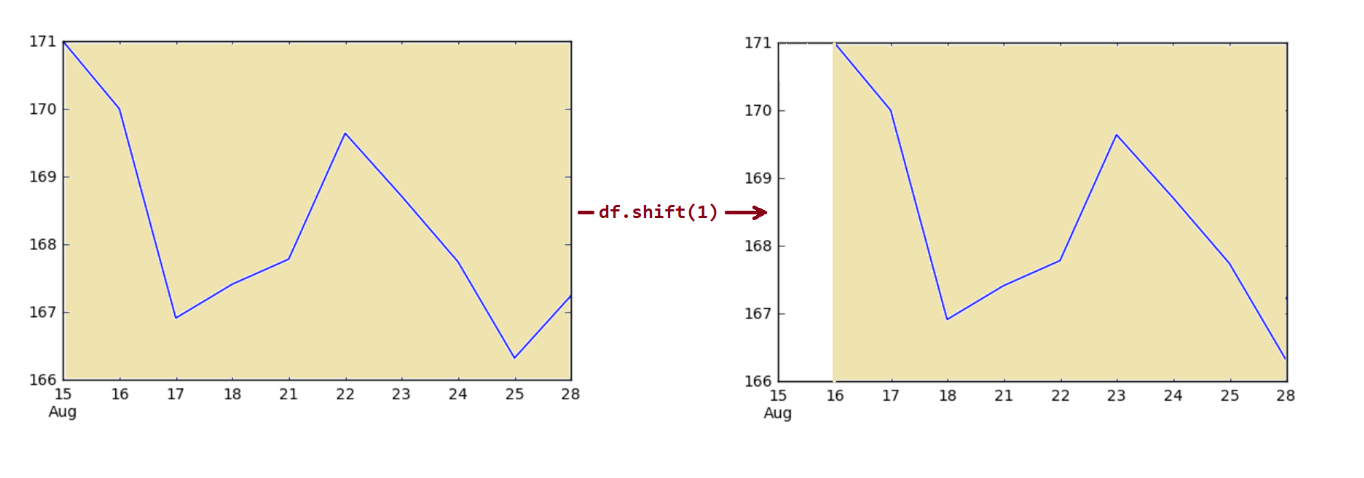

In [12]:
df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [13]:
df.shift(3)

,Price
Date,
2017-08-15,NaN
2017-08-16,NaN
2017-08-17,NaN
2017-08-18,171.00
2017-08-21,170.00
2017-08-22,166.91
2017-08-23,167.41
2017-08-24,167.78
2017-08-25,169.64


In [14]:
df.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


#Creating a new column previous day price

In [15]:
df['Prev Day Price'] = df['Price'].shift(1)
df

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


#calculating the difference in the price in two consecutive days

In [16]:
df['Price Change'] = df['Price'] - df['Prev Day Price']
df

,Price,Prev Day Price,Price Change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


#**Calculating 5 day return in percentage**

In [17]:
df['5 day return'] =  (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev Day Price,Price Change,5 day return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


#making the dataframe as the previous one

In [18]:
df = df[['Price']]
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [19]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

#**Using tshift() function to shift datetimes.

In [20]:
df.index = pd.date_range(start='2017-08-15',periods=10, freq='B')
df

,Price
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32
2017-08-28,167.24


In [21]:
df.index


DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

**here tshift function shifts the datetime by 1**

In [22]:
df.tshift(1)

<ipython-input-22-ddee8c46d442>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(1)


,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24
